## QuasarNET Performance vs training set size
#### Plot to show performance of QuasarNET as a function of the size of the training set
xxx

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from quasarnet.io import read_truth
from qn_analysis import plot, utils, variables

In [2]:
figsize = (12,6.5)
fontsize = 18

temp_output_loc = '/global/cfs/projectdirs/desi/users/jfarr/QuasarNET_paper/'

plt.rc('font', size=fontsize)

### Load the results from the different QN models

In [3]:
## QN parameters
n_detect = 1
c_th = 0.8
include_c_qn = True

In [4]:
f_truth = variables.OUTDIR+'/data/truth/truth_dr12q.fits'
truth = read_truth([f_truth])

In [5]:
data = {}

## Load the QN 90% data.
f_qn = temp_output_loc+'/results/qn_results/qn_performance_vs_training_set_size/qn_90pc.fits'
data['QN_90'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

"""## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet.fits'
data['QN5_90'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test.fits'
data['QN5_test_90'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl.fits'
data['QN5_test_mkl_90'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1.fits'
data['QN50_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1_again.fits'
data['QN50_again_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_0.1_1.fits'
data['QN50_1_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1.fits'
data['QN50_test_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1_again.fits'
data['QN50_test_again_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_0.1_1.fits'
data['QN50_test_1_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1.fits'
data['QN50_test_mkl_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1_again.fits'
data['QN50_test_mkl_again_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN data.
f_qn = '/global/homes/j/jfarr/Projects/QuasarNET/test_mkl/qn_qnet_test_mkl_0.1_1.fits'
data['QN50_test_mkl_1_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)"""

## Load the QN 10% data.
f_qn = temp_output_loc+'/results/qn_results/qn_performance_vs_training_set_size/qn_10pc.fits'
data['QN_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN TF2 10% data.
#f_qn = temp_output_loc+'/results/qn_results/qn_tf2_test.fits'
#data['QNtf2_10'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN 5% data.
f_qn = temp_output_loc+'/results/qn_results/qn_performance_vs_training_set_size/qn_5pc.fits'
data['QN_5'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN 2.5% data.
#f_qn = temp_output_loc+'/results/qn_results/qn_performance_vs_training_set_size/qn_2.5pc.fits'
#data['QN_2.5'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

## Load the QN 1% data.
#f_qn = temp_output_loc+'/results/qn_results/qn_performance_vs_training_set_size/qn_1pc.fits'
#data['QN_1'] = utils.load_qn_data(f_qn,n_detect=n_detect,c_th=c_th,include_c=include_c_qn)

### Find the set of common targetids, and reduce all data to that set
This finds which targetids* are common to all datasets, and removes any that are not common. It then matches the data from each classifier to each targetid, and produces a single data table.

\* targetid = plate$\times$1000000000 + mjd$\times$10000 + fiber

In [6]:
data_table = utils.reduce_data_to_table(data,truth,include_c_qn=include_c_qn)
data_table[:5]

INFO: 56135 common targetids


THING_ID,TARGETID,ZCONF_PERSON,Z_VI,CLASS_VI,ISQSO_VI,Z_QN_90,Z_QN_10,Z_QN_5,CLASS_QN_90,CLASS_QN_10,CLASS_QN_5,ISQSO_QN_90,ISQSO_QN_10,ISQSO_QN_5,C_QN_90 [6],C_QN_10 [6],C_QN_5 [6]
int64,int64,int64,float64,str8,bool,float64,float64,float64,str8,str8,str8,bool,bool,bool,float64,float64,float64
75657603,3586551810414,2,0.000,STAR,False,2.057,2.015,0.696,NONQSO,NONQSO,NONQSO,False,False,False,0.000 .. 0.000,0.000 .. 0.000,0.000 .. 0.000
96887043,3586551810500,2,0.000,STAR,False,2.022,2.134,0.702,NONQSO,NONQSO,NONQSO,False,False,False,0.000 .. 0.000,0.000 .. 0.000,0.000 .. 0.000
106776674,3586551810510,2,0.000,STAR,False,1.515,1.509,1.483,NONQSO,NONQSO,NONQSO,False,False,False,0.000 .. 0.000,0.000 .. 0.000,0.000 .. 0.000
104298275,3586551810514,1,2.100,QSO,True,1.106,1.114,1.103,QSO,QSO,NONQSO,True,True,False,0.000 .. 0.000,0.119 .. 0.000,0.203 .. 0.000
110192537,3586551810540,2,0.074,GALAXY,False,1.689,1.270,2.377,NONQSO,NONQSO,NONQSO,False,False,False,0.000 .. 0.000,0.000 .. 0.000,0.000 .. 0.000


In [7]:
# Include only objects in the data table that have the highest confidence level.
data_table = data_table[data_table['ZCONF_PERSON']==2]
len(data_table)

54916

### Compare the performance of the different model/data combos.
xxx

In [8]:
ls = {'QN_90': '-',
      'QN_10': '--',
      'QN_5': '-.',
      'QN_2.5': '-.',
      'QN_1': ':',

      'QN5_90': '-',
      'QN5_test_90': '--',
      'QN5_test_mkl_90': '-.',

      'QN50_10': '-',
      'QN50_again_10': '-',
      'QN50_1_10': '-',
      'QN50_test_10': '--',
      'QN50_test_again_10': '--',
      'QN50_test_1_10': '--',
      'QN50_test_mkl_10': '-.',
      'QN50_test_mkl_again_10': '-.',
      'QN50_test_mkl_1_10': '-.',
     }

In [9]:
## Define general parameter values.
dv_max = 6000.
nspec_sdr12q = 627751

## QN parameters.
cth = 0.8
n_detect = 1

In [10]:
## Define strategies.
strategies = {}

for s in data.keys():
    
    p = float(s.split('_')[-1])/100
    name = 'Model trained on\n{:.0%} DR12 Superset\n({:,} spectra)'.format(p,int(p*nspec_sdr12q))
    
    strategies[s] = {'w': ((data_table['C_{}'.format(s)]>cth).sum(axis=1)>=n_detect),
                        'confs': (data_table['C_{}'.format(s)]).max(axis=1),
                        'z': data_table['Z_{}'.format(s)],
                        'n': name,
                        'ls': ls[s],
                       }

/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/astropy/table/column.py:991: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:258: RuntimeWarning: divide by zero encountered in true_divide
  dv = 300000. * (z_s-data_table['Z_VI']) / (1+data_table['Z_VI'])


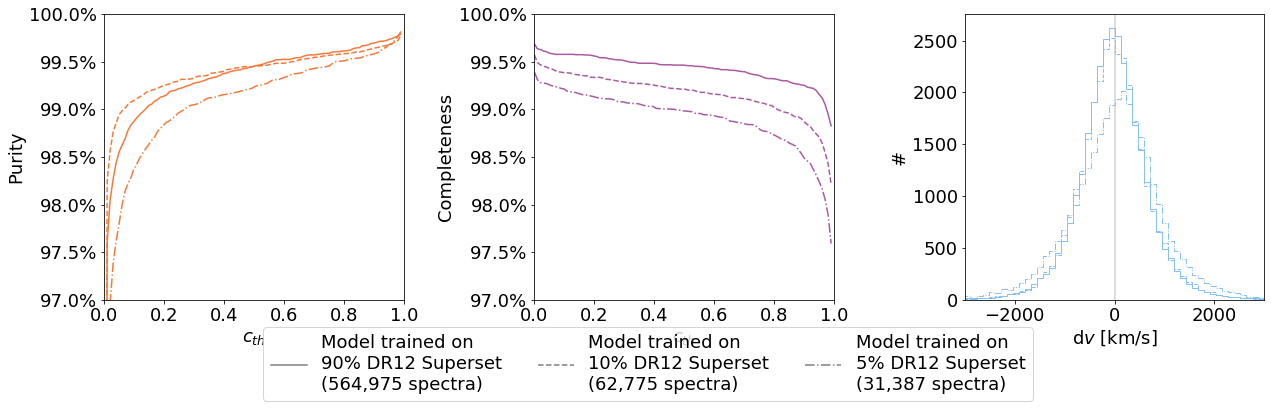

In [11]:
filename = '../plots/qn_performance_vs_training_set_size_3panel.pdf'

plot.plot_qn_model_compare_3panel(data_table,strategies,filename=filename,
                             dv_max=dv_max,figsize=(18,6),
                             ymin=0.97,ymax=1.)

plt.show()

/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/astropy/table/column.py:991: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/global/u1/j/jfarr/.conda/envs/qnet/lib/python3.7/site-packages/qn_analysis/plot.py:353: RuntimeWarning: divide by zero encountered in true_divide
  dv = 300000. * (z_s-data_table['Z_VI']) / (1+data_table['Z_VI'])


Strategy QN_90:
Crossover occurs at:
cth: [0.5  0.51 0.52 0.53]
pur: [0.9945 0.9946 0.9947 0.9948]
com: [0.9947 0.9946 0.9946 0.9946]
QN_90 has median velocity error -34.168 and standard deviation 760.424

Strategy QN_10:
Crossover occurs at:
cth: [0.24 0.25 0.26 0.27]
pur: [0.9929 0.9931 0.9932 0.9932]
com: [0.9932 0.9931 0.9931 0.993 ]
QN_10 has median velocity error -27.706 and standard deviation 785.096

Strategy QN_5:
Crossover occurs at:
cth: [0.3  0.31 0.32 0.33]
pur: [0.9905 0.9906 0.9908 0.9909]
com: [0.9908 0.9907 0.9906 0.9906]
QN_5 has median velocity error 54.430 and standard deviation 973.713



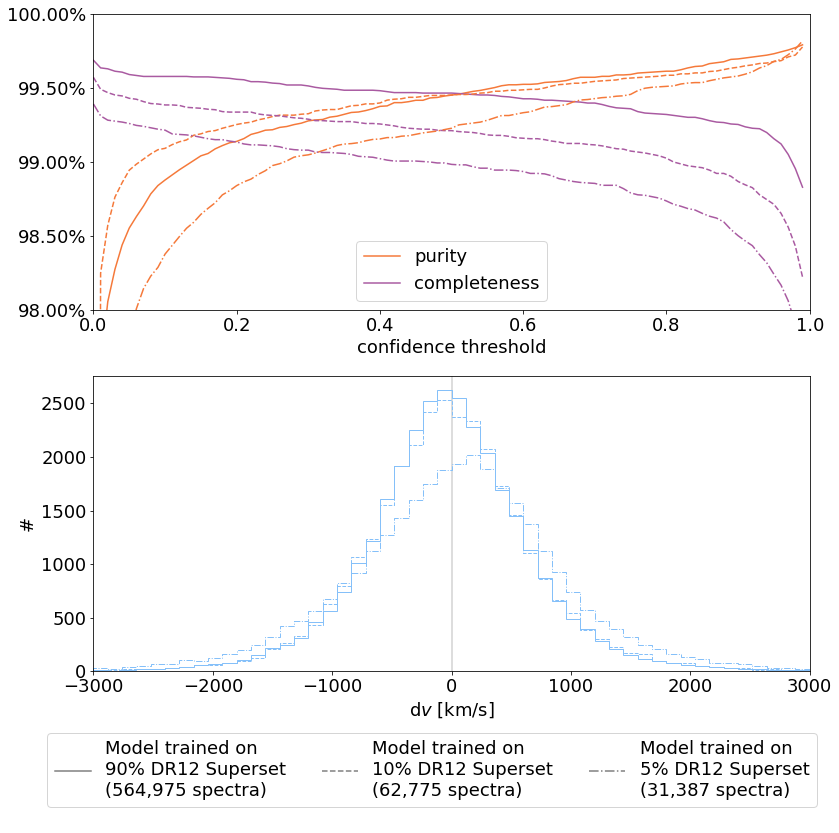

In [12]:
filename = '../plots/qn_performance_vs_training_set_size_2panel.pdf'

plot.plot_qn_model_compare_2panel(data_table,strategies,filename=filename,
                             dv_max=dv_max,nydec=2,figsize=(12,12),
                             ymin=0.98,ymax=1.,verbose=True)
plt.show()